<a href="https://colab.research.google.com/github/peggyc3/python_3ema_tradealgorithm/blob/main/Copy_of_3smacross_SPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 3 moving average crosover strategy to trade stocks
# trade parameters: fast, med slow exponential moving averages



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data spy 2008-2020
from google.colab import files
uploaded = files.upload()


Saving SPY201820.csv to SPY201820.csv


In [ ]:
#store data into a variable
spy = pd.read_csv('SPY201820.csv')
spy

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-04,271.200012,272.160004,270.540009,271.609985,257.892456,80636400
1,2018-01-05,272.510010,273.559998,271.950012,273.420013,259.611115,83524000
2,2018-01-08,273.309998,274.100006,272.980011,273.920013,260.085846,57319200
3,2018-01-09,274.399994,275.250000,274.079987,274.540009,260.674530,57254000
4,2018-01-10,273.679993,274.420013,272.920013,274.119995,260.275726,69574300
...,...,...,...,...,...,...,...
687,2020-09-28,333.220001,334.959991,332.149994,334.190002,334.190002,64584600
688,2020-09-29,333.970001,334.769989,331.619995,332.369995,332.369995,51304000
689,2020-09-30,333.089996,338.290009,332.880005,334.890015,334.890015,103653800
690,2020-10-01,337.690002,338.739990,335.010010,337.040009,337.040009,88698700


In [ ]:
#Set the data index to be Date
spy = spy.set_index(pd.DatetimeIndex(spy['Date'].values))
spy

,Date,Open,High,Low,Close,Adj Close,Volume
2018-01-04,2018-01-04,271.200012,272.160004,270.540009,271.609985,257.892456,80636400
2018-01-05,2018-01-05,272.510010,273.559998,271.950012,273.420013,259.611115,83524000
2018-01-08,2018-01-08,273.309998,274.100006,272.980011,273.920013,260.085846,57319200
2018-01-09,2018-01-09,274.399994,275.250000,274.079987,274.540009,260.674530,57254000
2018-01-10,2018-01-10,273.679993,274.420013,272.920013,274.119995,260.275726,69574300
...,...,...,...,...,...,...,...
2020-09-28,2020-09-28,333.220001,334.959991,332.149994,334.190002,334.190002,64584600
2020-09-29,2020-09-29,333.970001,334.769989,331.619995,332.369995,332.369995,51304000
2020-09-30,2020-09-30,333.089996,338.290009,332.880005,334.890015,334.890015,103653800
2020-10-01,2020-10-01,337.690002,338.739990,335.010010,337.040009,337.040009,88698700


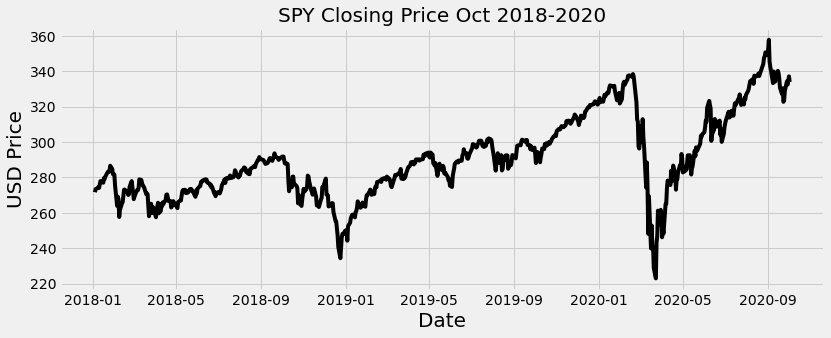

In [ ]:
#display the SPY chart
plt.figure(figsize=(12.2, 4.5))
plt.title('SPY Closing Price Oct 2018-2020', fontsize = 20)
plt.plot(spy['Close'], color='black')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('USD Price', fontsize = 20)
plt.show()

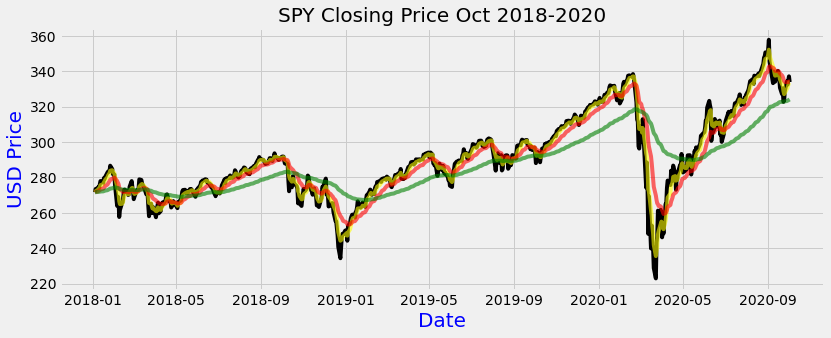

In [ ]:
# calculate EMAs, default params
fast = 5
med = 20
slow = 100

fastEMA = spy.Close.ewm(span=fast, adjust = False).mean()
medEMA = spy.Close.ewm(span=med, adjust = False).mean()
slowEMA = spy.Close.ewm(span=slow, adjust = False).mean()

#show the EMAs
plt.figure(figsize=(12.2, 4.5))
plt.title('SPY Closing Price Oct 2018-2020', fontsize = 20, color='black')
plt.plot(spy['Close'], color='black')
plt.plot(fastEMA, label='fast EMA', color='yellow', alpha=0.6)
plt.plot(medEMA,  label='medium EMA', color='red', alpha=0.6)
plt.plot(slowEMA, label='slow EMA', color='green', alpha=0.6)
plt.xlabel('Date', fontsize = 20, color='blue')
plt.ylabel('USD Price', fontsize = 20, color='blue')
plt.show()

In [ ]:
# Add ema columns to data set for calculations


In [ ]:
# trade parameters: fast, med slow exponential moving averages
#trade rules: BTO when fast crosses above med and med is above slow,  STC when fast crosses below med, STO when fast below med and med crosses below slow, BTC when med crosses above slow
